<Axes: xlabel='接客の評価', ylabel='ホテルの環境評価'>

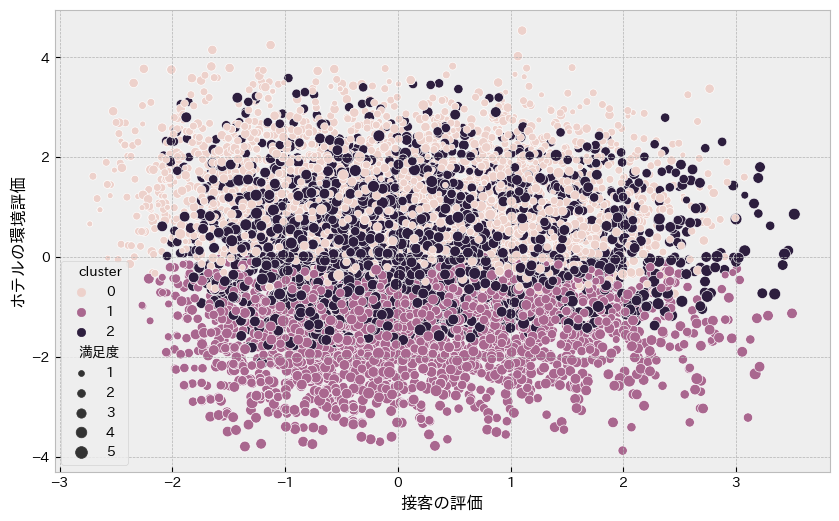

In [8]:
"""
データ分析　演習問題5

目的：主成分分析とクラスタリングを使い、クラスタリングで分けられたグループについてさらに分析
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings

import statsmodels.api as sm

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('../../data/dummy_data/hotel_reviews.csv')

# 数値だけのDataFrameに
df_numeric = df.select_dtypes(include='number')

# 年齢の相関を確認
df_numeric.corr()['年齢']

# 年齢と満足度を除外
_df = df_numeric.drop(['年齢', '満足度'], axis=1)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(_df)

# クラスタリング数を3に設定してクラスタリング（エルボー法についてはexercise4を参照して）
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_

# DataFrameに追加
df['cluster'] = cluster

# 主成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0)
feature = pca.fit_transform(x_scaled)

#  NOTE:ホテルの環境評価：設備とサービス
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])

new_data = pd.concat([df, feature_df], axis=1)

# 主成分と要素の相関のヒートマップ
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

# sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

# sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data)

# sns.scatterplot(x='総合評価', y='接客の評価', hue='cluster', size='満足度', data=new_data)

sns.scatterplot(x='接客の評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data)